## Load and Inspect

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
try:
    df = pd.read_csv('/sales_data_sample.csv', encoding='latin1')
except UnicodeDecodeError:
    print("Could not decode using latin1. Trying with 'cp1252'")
    df = pd.read_csv('/sales_data_sample.csv', encoding='cp1252')


# Quick inspection
print(df.head())
print(df.info())
print(df.describe())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

## Data Cleaning

In [ ]:
# Check and handle missing values
print(df.isnull().sum())
df_clean = df.dropna()  # or fillna() as appropriate

# Convert ORDERDATE to datetime
df_clean['ORDERDATE'] = pd.to_datetime(df_clean['ORDERDATE'])


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


/tmp/ipython-input-3518629929.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ORDERDATE'] = pd.to_datetime(df_clean['ORDERDATE'])


# Feature Engineering

In [ ]:
# Create Year, Month, and Day Features
df_clean['Year'] = df_clean['ORDERDATE'].dt.year
df_clean['Month'] = df_clean['ORDERDATE'].dt.month
df_clean['Day'] = df_clean['ORDERDATE'].dt.day

# Example: Calculate total SALES per order (if not already present)
df_clean['TOTAL_SALES'] = df_clean['SALES']

# Aggregate data: sales per customer
sales_by_customer = df_clean.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False)
print(sales_by_customer.head())


CUSTOMERNAME
Australian Collectors, Co.    200995.41
Anna's Decorations, Ltd       153996.13
Souveniers And Things Co.     151570.98
Name: SALES, dtype: float64


/tmp/ipython-input-408580849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['ORDERDATE'].dt.year
/tmp/ipython-input-408580849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['ORDERDATE'].dt.month
/tmp/ipython-input-408580849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

## Top Customers by Sales



/tmp/ipython-input-3051537973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')


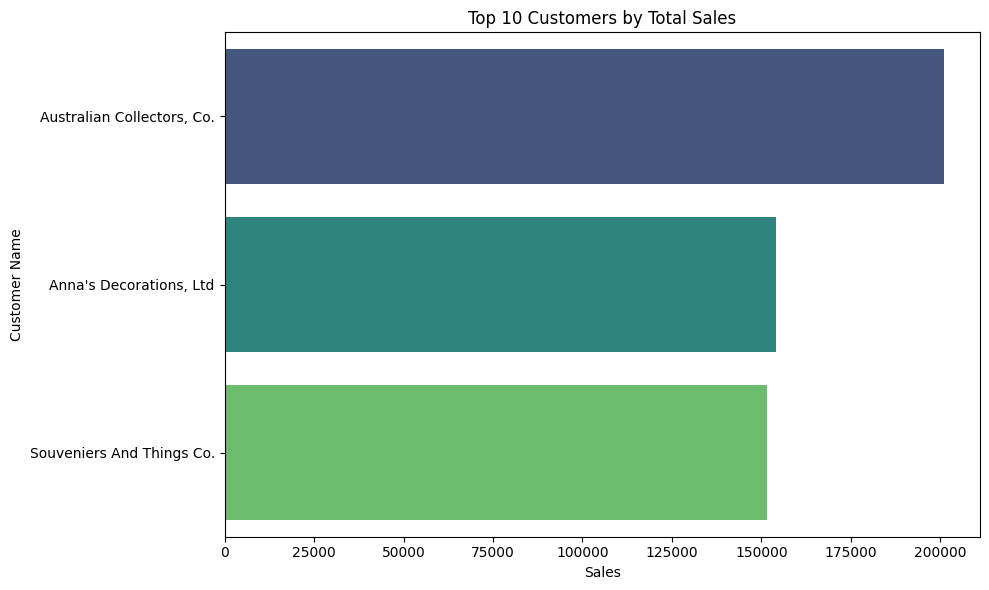

In [ ]:
top_customers = sales_by_customer.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Sales')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()


## Sales Trend Over Time

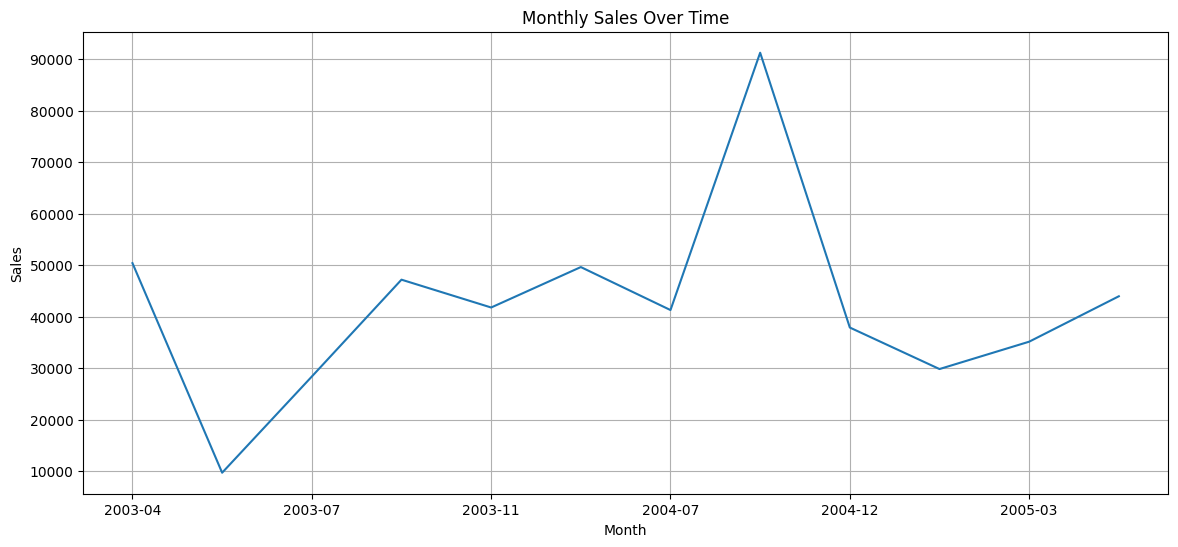

In [ ]:
monthly_sales = df_clean.groupby(df_clean['ORDERDATE'].dt.to_period('M'))['SALES'].sum()
monthly_sales.index = monthly_sales.index.astype(str)
plt.figure(figsize=(14, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()


# Product Line Analysis

/tmp/ipython-input-2489135334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='cool')


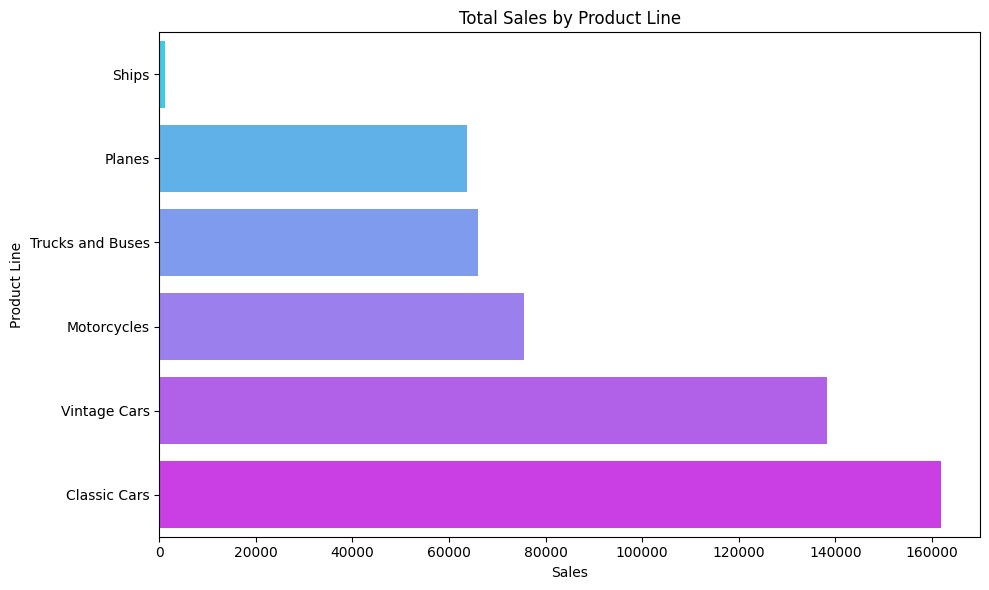

In [ ]:
product_sales = df_clean.groupby('PRODUCTLINE')['SALES'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='cool')
plt.title('Total Sales by Product Line')
plt.xlabel('Sales')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()


# Regional Sales

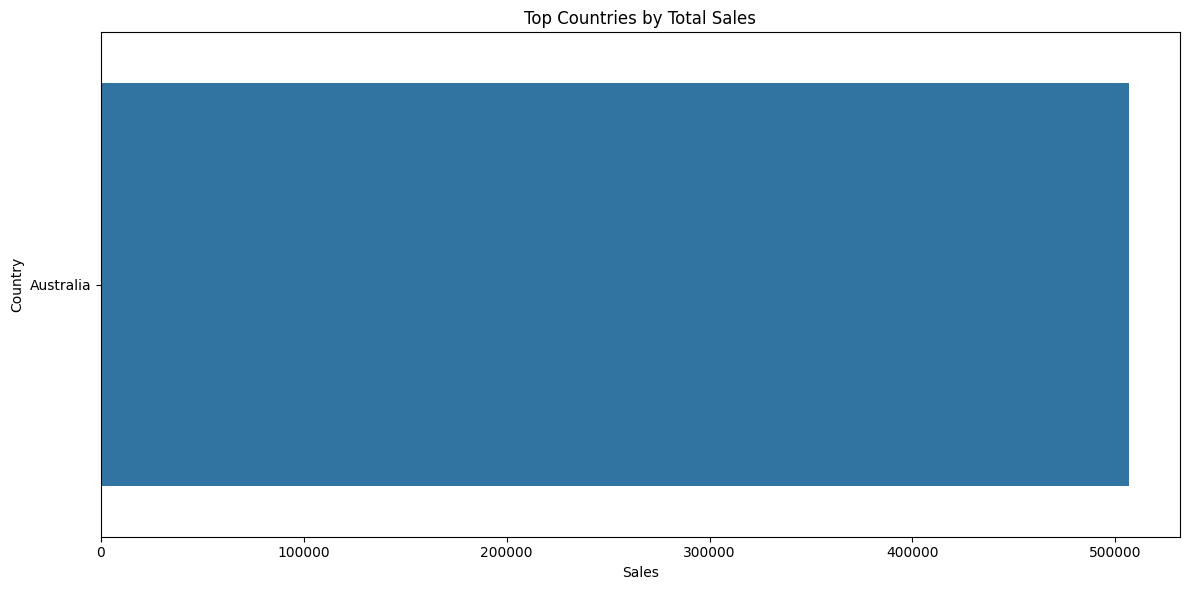

In [ ]:
country_sales = df_clean.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)[:15]
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title('Top Countries by Total Sales')
plt.xlabel('Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


# Deal Size Distribution

/tmp/ipython-input-937784581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deal_size_sales.index, y=deal_size_sales.values, palette='Set2')


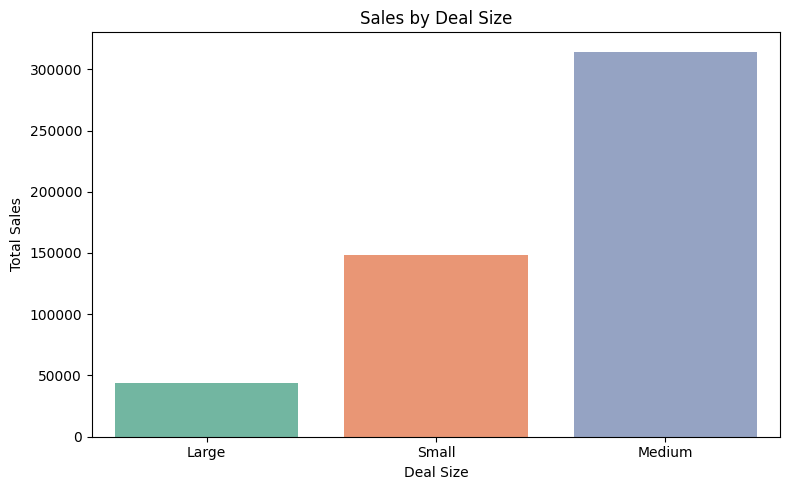

In [ ]:
deal_size_sales = df_clean.groupby('DEALSIZE')['SALES'].sum().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=deal_size_sales.index, y=deal_size_sales.values, palette='Set2')
plt.title('Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


# Year-over-Year Growth

In [ ]:
yoy_sales = df_clean.groupby('Year')['SALES'].sum()
growth = yoy_sales.pct_change().fillna(0) * 100
print("Year-over-Year Growth (%):\n", growth)


Year-over-Year Growth (%):
 Year
2003     0.000000
2004    23.966772
2005   -50.475812
Name: SALES, dtype: float64


# Top Products per Product Line

In [ ]:
top_product_per_line = df_clean.groupby(['PRODUCTLINE', 'PRODUCTCODE'])['SALES'].sum().reset_index()
top_prod = top_product_per_line.sort_values(['PRODUCTLINE', 'SALES'], ascending=[True, False]).groupby('PRODUCTLINE').first()
print(top_prod)


                 PRODUCTCODE     SALES
PRODUCTLINE                           
Classic Cars        S10_4962  12762.43
Motorcycles         S10_4698  19038.89
Planes             S700_3167  10017.12
Ships              S700_2047   1089.36
Trucks and Buses    S12_1666  18616.09
Vintage Cars        S18_2795  19255.22


# Exporting Results for Reporting

In [ ]:
# Export summarized data to CSV
top_customers.to_csv('top_customers.csv')
product_sales.to_csv('product_sales.csv')


# Major Data Visualizations
Import All Visualization Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import altair as alt
import cufflinks as cf

# Enable Plotly in offline mode (if running locally)
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'colab', 'iframe', etc.
cf.go_offline()


# Visualizations With Multiple Libraries
Top Customers by Total Sales

/tmp/ipython-input-2440281004.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




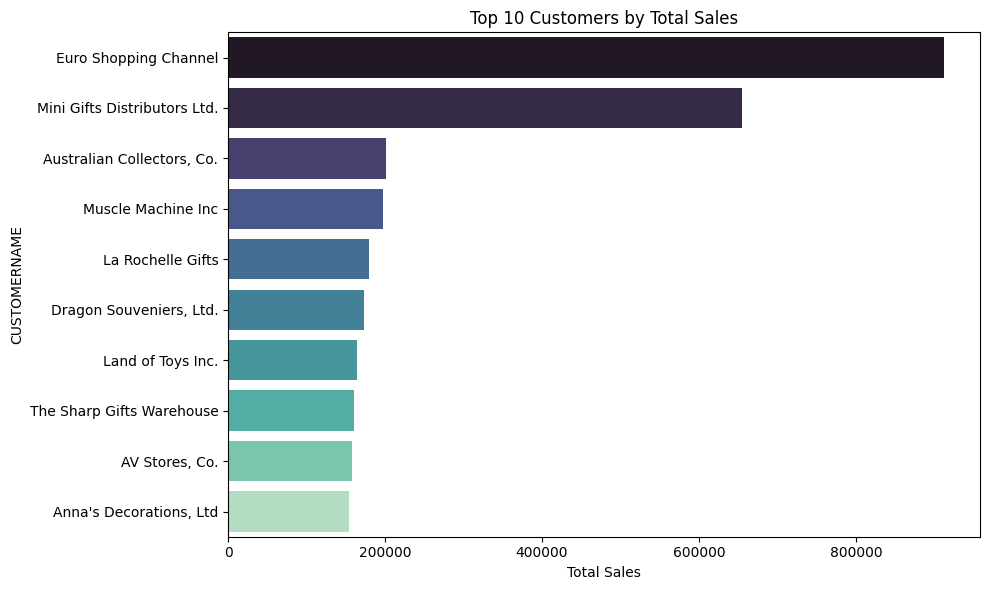

In [ ]:
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='mako')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()


Plotly

In [ ]:
fig = px.bar(
    x=top_customers.values, y=top_customers.index,
    orientation='h', labels={'x': 'Total Sales', 'y': 'Customer Name'},
    title='Top 10 Customers by Total Sales'
)
fig.show()


Altair

In [ ]:
alt_df = top_customers.reset_index().rename(columns={'CUSTOMERNAME':'Customer','SALES':'TotalSales'})
chart = alt.Chart(alt_df).mark_bar().encode(
    x='TotalSales:Q',
    y=alt.Y('Customer:N', sort='-x')
).properties(title='Top 10 Customers by Total Sales')
chart.display()


alt.Chart(...)

# Boxplot of Sales by Product Line
Seaborn

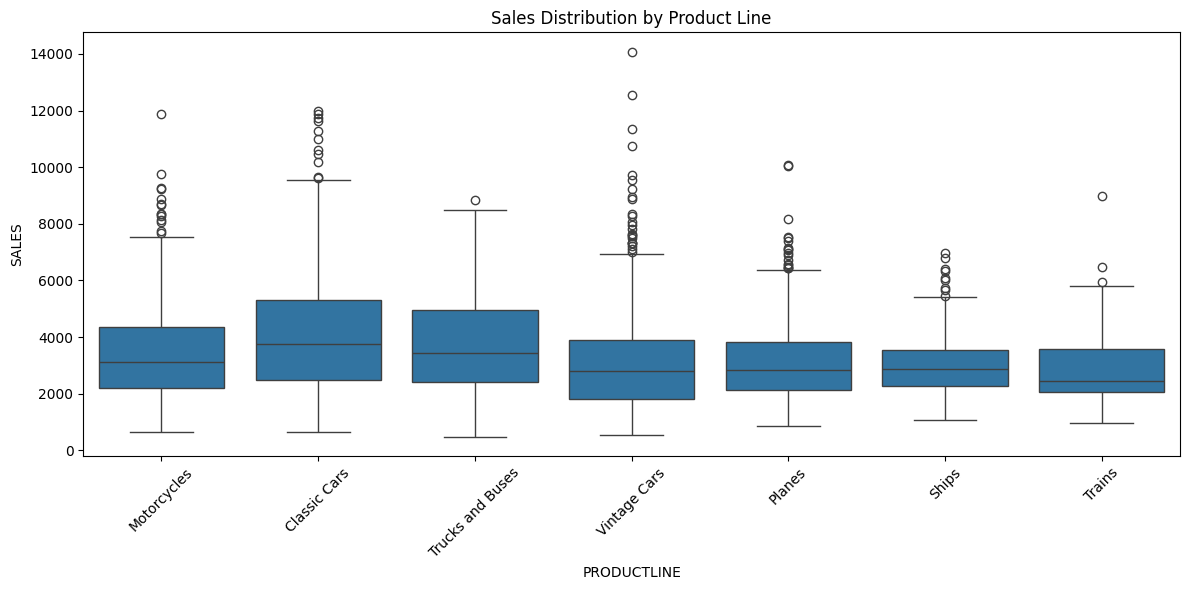

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title('Sales Distribution by Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Plotly

In [ ]:
fig = px.box(df, x='PRODUCTLINE', y='SALES', title='Sales Distribution by Product Line')
fig.show()


# Correlation Heatmap (Numerical Features)
Seaborn

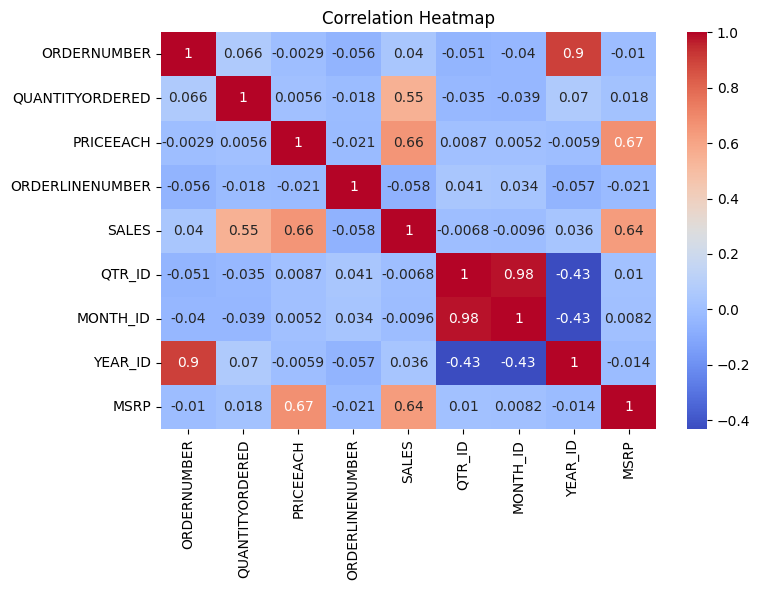

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
